In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

In [4]:
theta_180_1 = pd.read_csv('180_theta_1.csv')
theta_180_1.head()

,xAccl,yAccl,zAccl,newPosition,time,pcTime
0,986,-18,-139,0,346578,440.011024
1,1004,-9,-20,0,371496,464.955807
2,852,33,187,0,396496,490.056992
3,977,-134,298,0,421500,514.984846
4,498,88,594,0,446507,540.004730


In [ ]:
theta_180_1['delta_time'] = theta_180_1['pcTime'].diff()
theta_180_1.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,986,-18,-139,0,346578,440.011024,NaN
1,1004,-9,-20,0,371496,464.955807,24.944782
2,852,33,187,0,396496,490.056992,25.101185
3,977,-134,298,0,421500,514.984846,24.927855
4,498,88,594,0,446507,540.004730,25.019884
5,316,109,787,0,471510,564.953804,24.949074
6,-77,83,873,0,496515,590.039015,25.085211
7,-139,-6,866,0,521521,614.953995,24.914980
8,-486,-16,756,0,546522,640.062809,25.108814
9,-803,245,637,0,571525,664.983034,24.920225


In [6]:
acc_x = theta_180_1['xAccl'].values
acc_y = theta_180_1['yAccl'].values
acc_z = theta_180_1['zAccl'].values
time = theta_180_1['time'].values

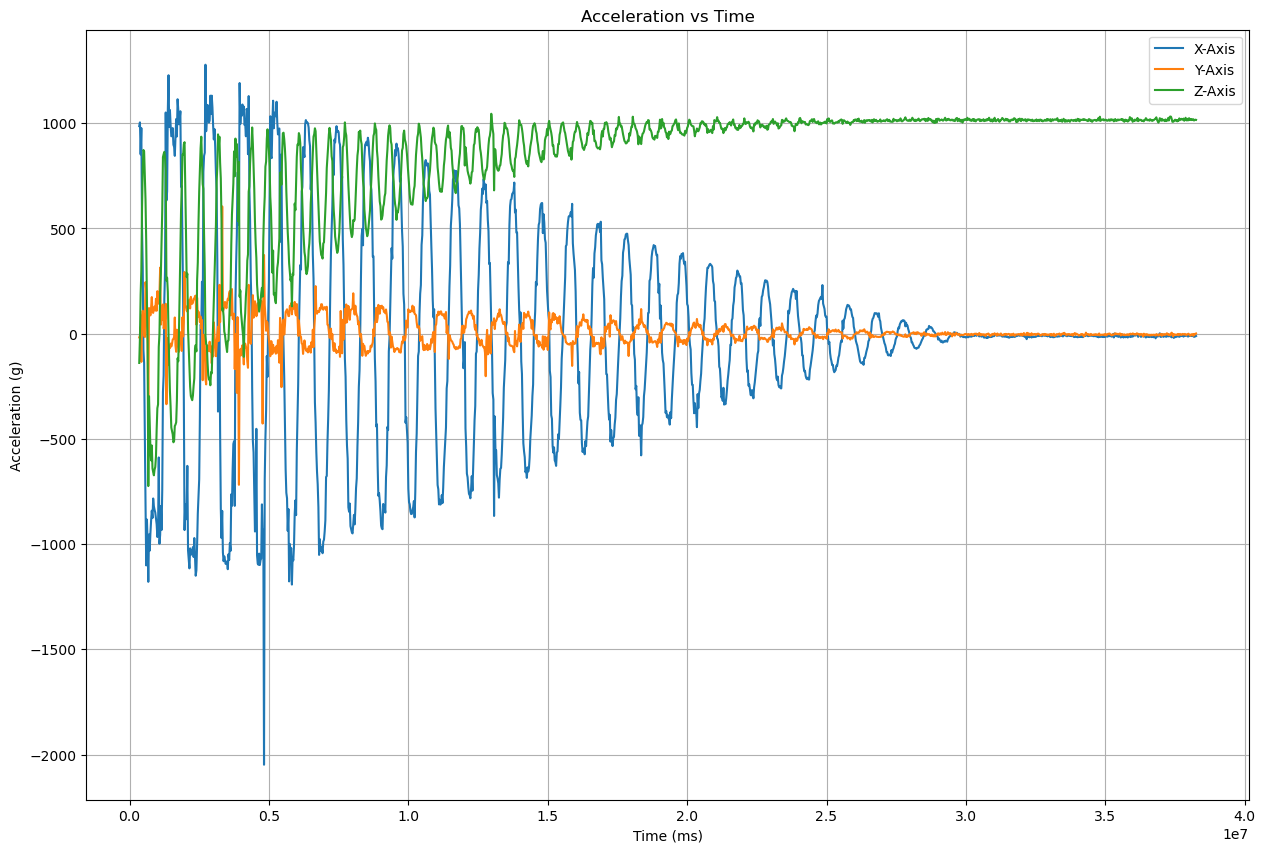

In [7]:
# Plot the data
plt.figure(figsize=(15, 10))
plt.plot(time, acc_x, label='X-Axis')
plt.plot(time, acc_y, label='Y-Axis')
plt.plot(time, acc_z, label='Z-Axis')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration vs Time')
plt.legend(['X-Axis', 'Y-Axis', 'Z-Axis'])
plt.grid(True)
plt.show()

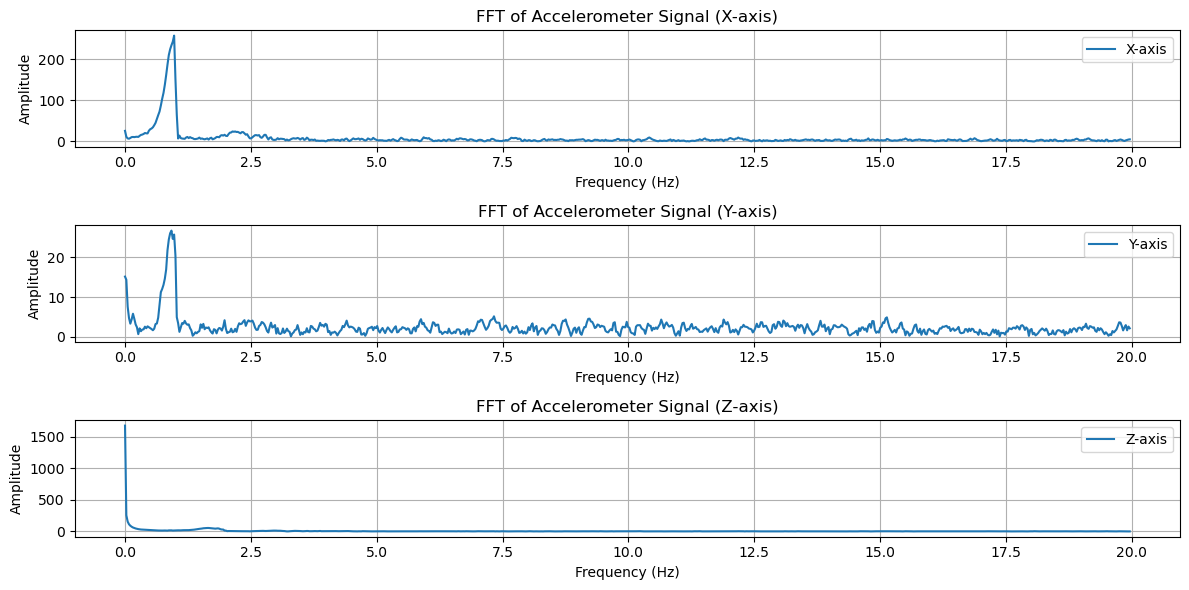

In [9]:
fs = 40 # Sampling frequency (Hz) ---> delta_time = 25ms ==> 1/0.025 = 40Hz

# Number of sample points
N = len(acc_x)
# Sample spacing
T = 1.0 / fs
# Compute the FFT
yf_x = fft(acc_x)
yf_y = fft(acc_y)
yf_z = fft(acc_z)
xf = fftfreq(N, T)[:N // 2]

# Plot the FFT
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

# Plot FFT for X-axis
ax[0].plot(xf, 2.0 / N * np.abs(yf_x[:N // 2]), label='X-axis')
ax[0].set_title('FFT of Accelerometer Signal (X-axis)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()

# Plot FFT for Y-axis
ax[1].plot(xf, 2.0 / N * np.abs(yf_y[:N // 2]), label='Y-axis')
ax[1].set_title('FFT of Accelerometer Signal (Y-axis)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].legend()

# Plot FFT for Z-axis
ax[2].plot(xf, 2.0 / N * np.abs(yf_z[:N // 2]), label='Z-axis')
ax[2].set_title('FFT of Accelerometer Signal (Z-axis)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[2].legend()

plt.tight_layout()
plt.show()

In [10]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

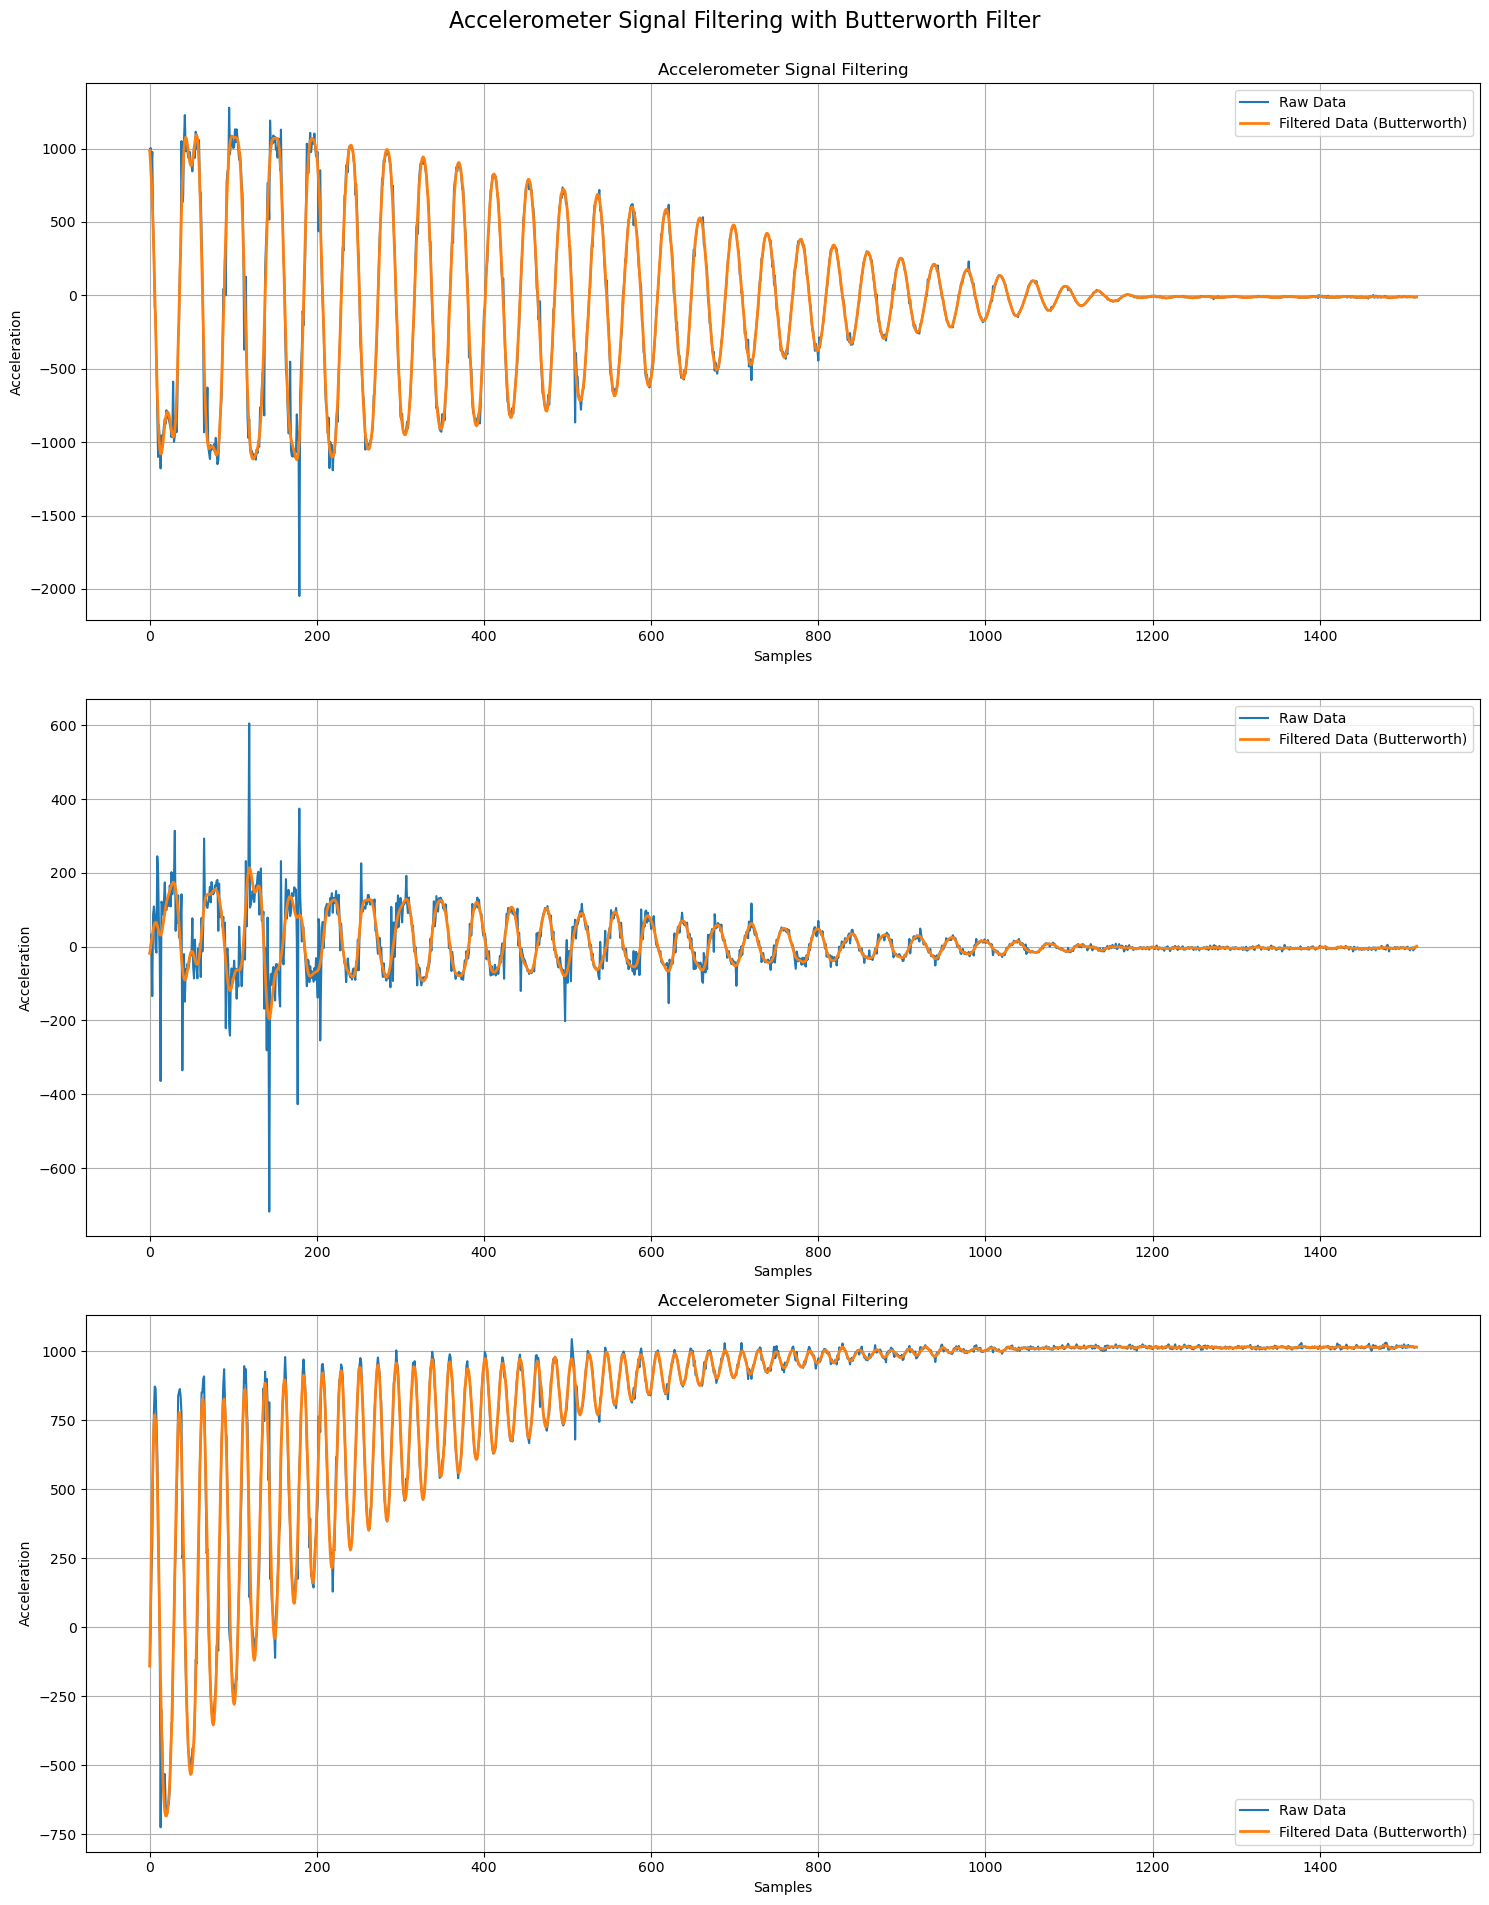

In [11]:
# Filter requirements:
fs = 40  # 40 Hz sampling rate
cutoff = 3  # Filter out everything above 5 Hz

# Apply filter
filtered_acc_x = butter_lowpass_filter(acc_x, cutoff, fs)
filtered_acc_y = butter_lowpass_filter(acc_y, cutoff, fs)
filtered_acc_z = butter_lowpass_filter(acc_z, cutoff, fs)

# Plot the result
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

ax[0].plot(acc_x, label='Raw Data')
ax[0].plot(filtered_acc_x, label='Filtered Data (Butterworth)', linewidth=2)
ax[0].legend()
ax[0].set_title('Accelerometer Signal Filtering')
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Acceleration')
ax[0].grid(True)

ax[1].plot(acc_y, label='Raw Data')
ax[1].plot(filtered_acc_y, label='Filtered Data (Butterworth)', linewidth=2)
ax[1].legend()
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Acceleration')
ax[1].grid(True)

ax[2].plot(acc_z, label='Raw Data')
ax[2].plot(filtered_acc_z, label='Filtered Data (Butterworth)', linewidth=2)
ax[2].legend()
ax[2].set_xlabel('Samples')
ax[2].set_ylabel('Acceleration')
ax[2].grid(True)
ax[2].set_title('Accelerometer Signal Filtering')

plt.suptitle('Accelerometer Signal Filtering with Butterworth Filter', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjust layout to make room for the title
plt.show()

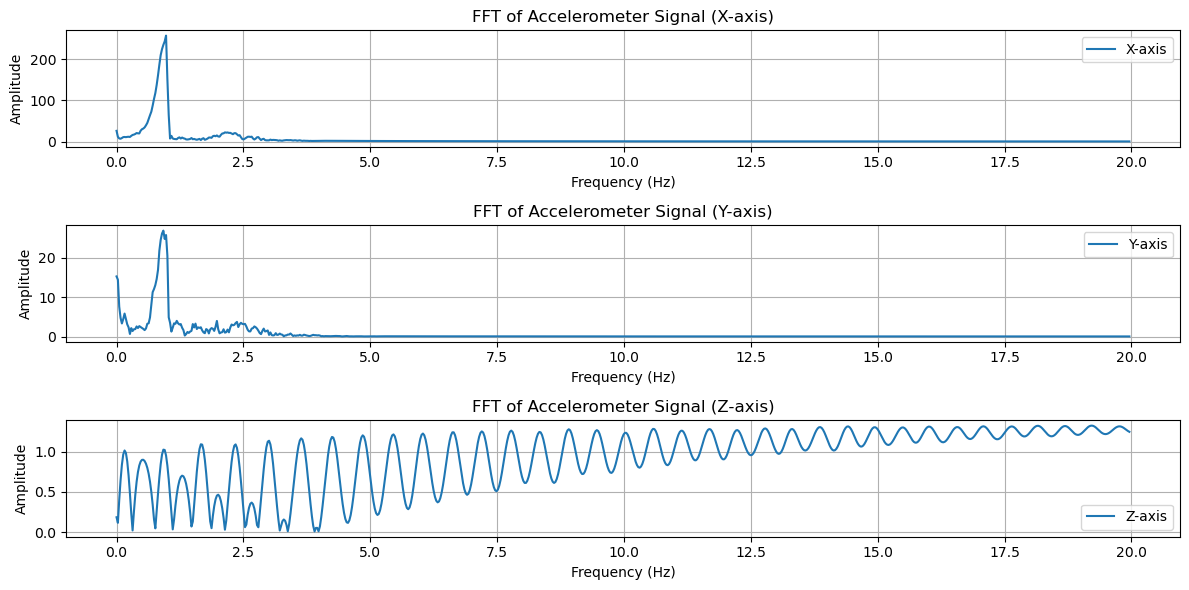

In [12]:
# Compute the FFT for filtered data
yf_x_filtered = fft(filtered_acc_x)
yf_y_filtered = fft(filtered_acc_y)
yf_z_filtered = fft(filtered_acc_z)

# Compute the FFT
xf = fftfreq(N, T)[:N // 2]

# Plot the FFT
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

# Plot FFT for X-axis
ax[0].plot(xf, 2.0 / N * np.abs(yf_x_filtered[:N // 2]), label='X-axis')
ax[0].set_title('FFT of Accelerometer Signal (X-axis)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()

# Plot FFT for Y-axis
ax[1].plot(xf, 2.0 / N * np.abs(yf_y_filtered[:N // 2]), label='Y-axis')
ax[1].set_title('FFT of Accelerometer Signal (Y-axis)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].legend()

# Plot FFT for Z-axis
ax[2].plot(xf, 2.0 / N * np.abs(filtered_acc_z[:N // 2]), label='Z-axis')
ax[2].set_title('FFT of Accelerometer Signal (Z-axis)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[2].legend()

plt.tight_layout()
plt.show()